# Example of the aitlas toolbox in the context of image segmentation #

This notebook shows a sample implementation of a image segmentation using the aitlas toolbox.

## Import the required packages ##

In [3]:
from aitlas.datasets import LoveDADataset
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTranspose
from aitlas.models import DeepLabV3

## Visualize images and masks ##

Total number of patches: 2522


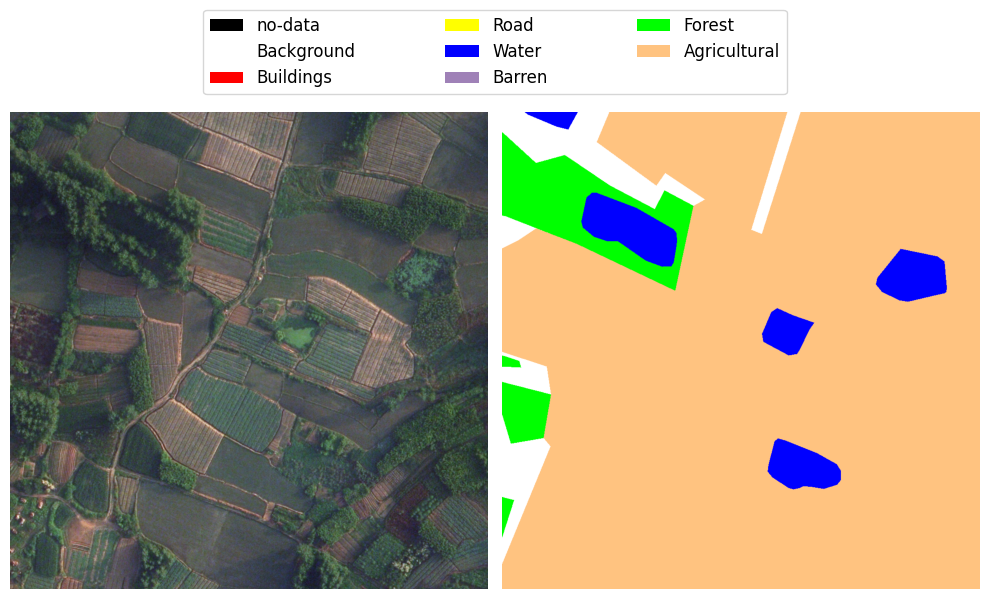

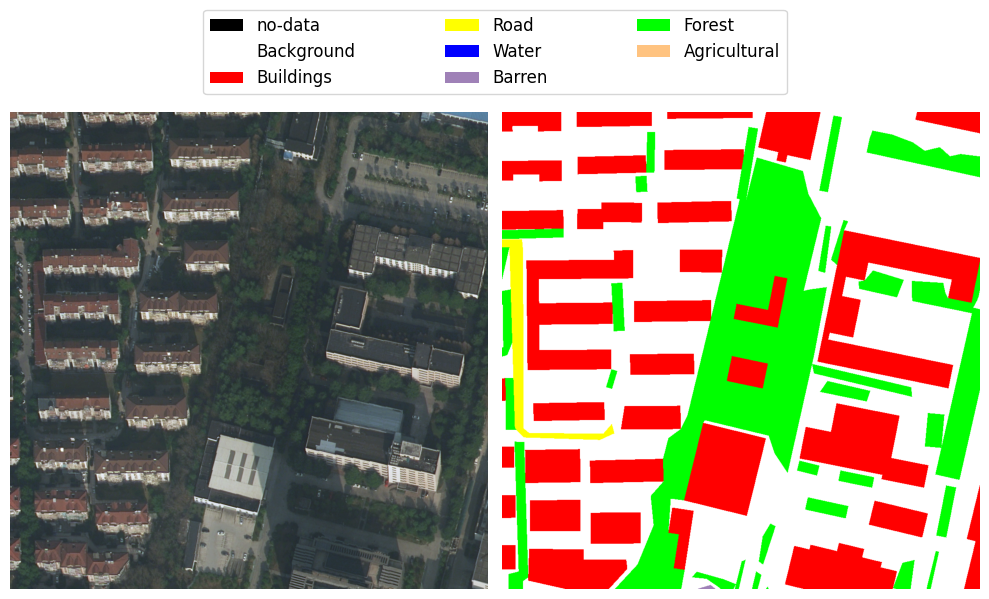

In [2]:
dataset_config = {
    "data_dir": "/home/dragik/data/semseg/LoveDA/Train"
}
dataset = LoveDADataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(11);
dataset.show_image(26);

In [9]:
dataset.data_distribution_table()

,Number of pixels
no-data,99632048.0
Background,910708224.0
Buildings,281493536.0
Road,134119824.0
Water,162729760.0
Barren,132748864.0
Forest,409074944.0
Agricultural,514001408.0


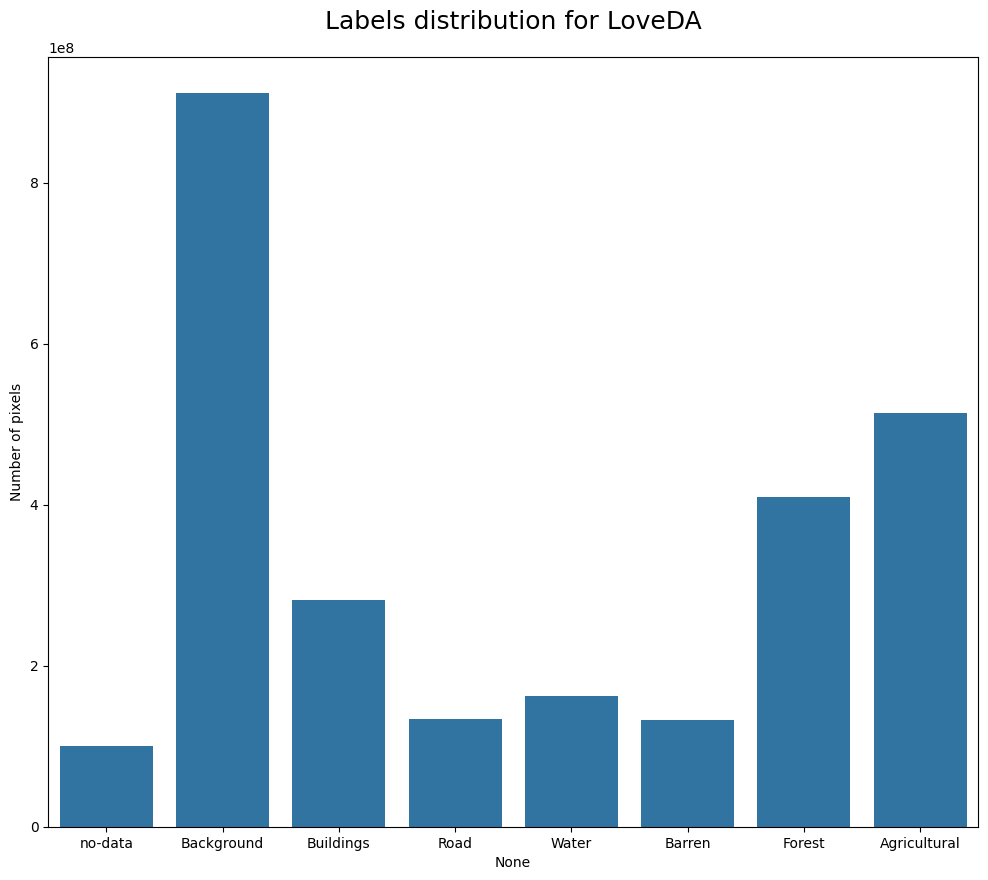

In [13]:
dataset.data_distribution_barchart();

## Load training data ##

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/LoveDA/Train",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}
train_dataset = LoveDADataset(train_dataset_config)
len(train_dataset)

2522

## Create the model ##

In [4]:
epochs = 5
model_directory = "/home/dragik/data/semseg/LoveDA/experiments"
model_config = {
    "num_classes": 8, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training ##

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
);

2024-04-16 11:35:56,805 INFO Starting training.
2024-04-16 11:35:57.062231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-16 11:35:57.639809: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
training: 100%|███████████████████████████████████████████████████████████████████████| 631/631 [07:36<00:00,  1.38it/s]
2024-04-16 11:43:34,840 INFO epoch: 1, time: 456, loss:  0.54523
testing on train set: 100%|███████████████████████████████████████████████████████████| 631/631 [02:31<00:00,  4.18it/s]
2024-04-16 11:46:07,107 INFO IOU:0.5979773049656132, IOU mean:0.6311915358315513, IOU per Class:[0.98436417 0.536804   0.58724908 0.52908463 0.72971003 0.35191465
 0.63941916 0.69098657]
training: 100%|███████

## Evaluate the model ##

In [6]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/home/dragik/data/semseg/LoveDA/Val",
    "transforms": ["aitlas.transforms.MinMaxNormTranspose"],
    "target_transforms": ["aitlas.transforms.Transpose"]
}

test_dataset = LoveDADataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model.running_metrics.reset()
model_path = "/home/dragik/data/semseg/LoveDA/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(model.metrics)

2024-04-16 12:28:02,762 INFO Loading checkpoint /home/dragik/data/semseg/LoveDA/experiments/checkpoint.pth.tar
2024-04-16 12:28:03,286 INFO Loaded checkpoint /home/dragik/data/semseg/LoveDA/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████████████████████████████████████████████| 418/418 [01:30<00:00,  4.62it/s]


[{'IOU': 0.5117858152725165,
  'IOU mean': 0.5405675698449648,
  'IOU per Class': array([0.9431553 , 0.51381921, 0.63816341, 0.53863401, 0.52934039,
         0.23484312, 0.43396451, 0.49262062])}]

## Predictions ##

2024-04-16 12:30:30,564 INFO Loading checkpoint /home/dragik/data/semseg/LoveDA/experiments/checkpoint.pth.tar
2024-04-16 12:30:31,226 INFO Loaded checkpoint /home/dragik/data/semseg/LoveDA/experiments/checkpoint.pth.tar at epoch 6


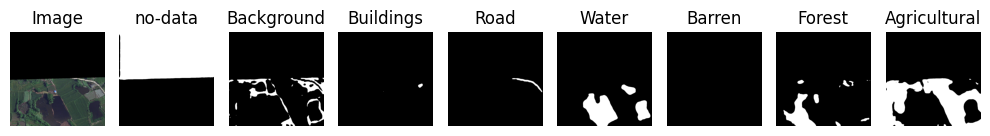

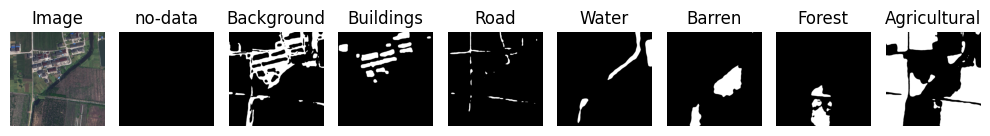

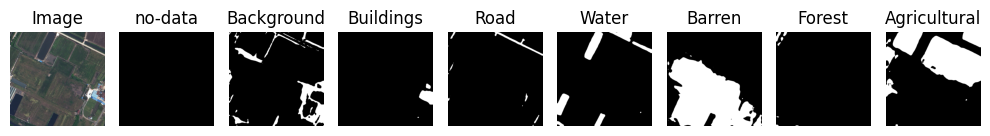

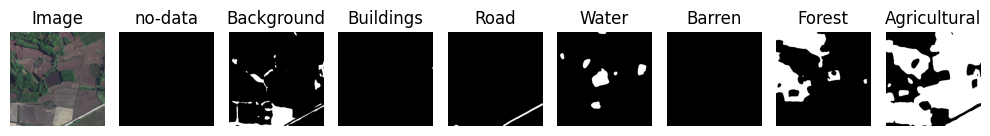

In [8]:
model_path = "/home/dragik/data/semseg/LoveDA/experiments/checkpoint.pth.tar"
labels = ["no-data","Background","Buildings","Road","Water","Barren","Forest","Agricultural"]
transform = MinMaxNormTranspose()
model.load_model(model_path)

image = image_loader('/home/dragik/data/semseg/LoveDA/Test/images/4191.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/LoveDA/Test/images/4200.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/LoveDA/Test/images/4224.png')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/home/dragik/data/semseg/LoveDA/Test/images/4298.png')
fig = model.predict_masks(image, labels, transform)